In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# Split the dataset into training, validation, and test sets
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

# Design MLP architecture
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(validation_images, validation_labels))

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8561 - loss: 0.4680 - val_accuracy: 0.9700 - val_loss: 0.1034
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9676 - loss: 0.1079 - val_accuracy: 0.9760 - val_loss: 0.0823
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9761 - loss: 0.0733 - val_accuracy: 0.9770 - val_loss: 0.0779
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9816 - loss: 0.0569 - val_accuracy: 0.9818 - val_loss: 0.0634
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9856 - loss: 0.0445 - val_accuracy: 0.9804 - val_loss: 0.0620
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9887 - loss: 0.0345 - val_accuracy: 0.9796 - val_loss: 0.0704
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9888 - loss: 0.0342 - val_accuracy: 0.9820 - val_loss: 0.0646
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9894 - loss: 0.0294 - val_accuracy: 

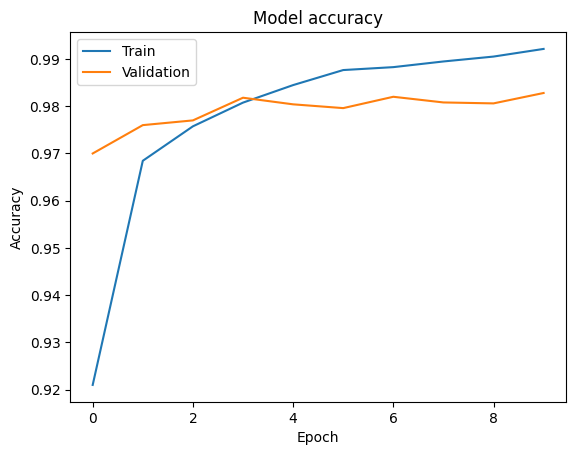

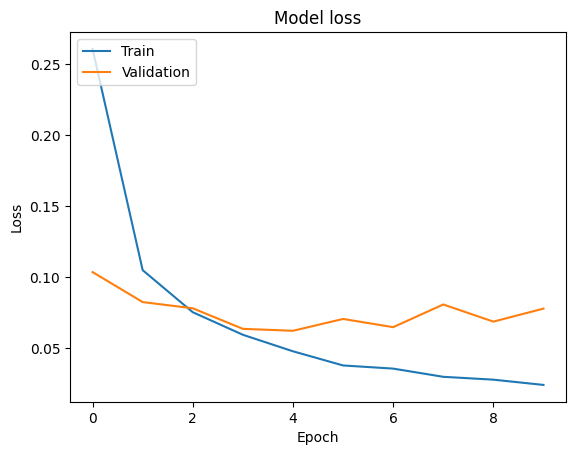

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print("\nNAME : YUVARAJ S\nREGISTER NUMBER : 212222240119\n")
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(test_labels, predicted_labels)
print("\nNAME : YUVARAJ S\nREGISTER NUMBER : 212222240119")
print("\nClassification Report:")
print(class_report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

NAME : YUVARAJ S
REGISTER NUMBER : 212222240119

Confusion Matrix:
[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1124    2    1    0    1    2    2    3    0]
 [   3    0 1020    1    1    0    1    4    2    0]
 [   1    0    9  988    0    5    0    4    2    1]
 [   0    0    3    0  962    0    4    4    1    8]
 [   1    0    0    4    1  872    5    0    7    2]
 [   5    2    1    0    4    3  942    0    1    0]
 [   0    0    7    0    0    0    0 1015    2    4]
 [   3    1   11    3    2    2    0    7  943    2]
 [   3    2    0    6   10    3    0    6    2  977]]

NAME : YUVARAJ S
REGISTER NUMBER : 212222240119

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

NAME : YUVARAJ S
REGISTER NUMBER : 212222240119
Predicted Label for image 0: 5


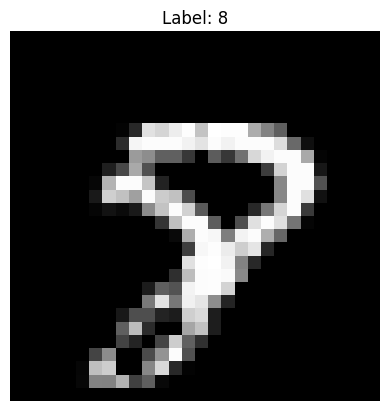

In [22]:
# Predict a single image
def predict_single_image(image):
    # Reshape image to match model input shape
    image = image.reshape(1, 28 * 28)
    # Normalize pixel values
    image = image / 255.0
    # Make prediction
    prediction = model.predict(image)
    # Get predicted label
    predicted_label = np.argmax(prediction)
    print("\nNAME : YUVARAJ S\nREGISTER NUMBER : 212222240119")
    return predicted_label

# Choose an index of the image you want to predict
image_index = 0
predicted_label = predict_single_image(test_images[image_index])
print("Predicted Label for image {}: {}".format(image_index, predicted_label))

# Visualize a random example image from the test set
def visualize_random_image(images, labels):
    # Select a random image index
    idx = np.random.randint(0, len(images))

    # Get the corresponding image and label
    img = images[idx]
    label = labels[idx]

    # Reshape the image to 28x28 for visualization
    img = np.reshape(img, (28, 28))

    # Plot the image
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

visualize_random_image(test_images, test_labels)